In [2]:
using SparseArrays, Plots, LinearAlgebra, DifferentialEquations, Arpack

┌ Info: Precompiling Arpack [7d9fca2a-8960-54d3-9f78-7d1dccf2cb97]
└ @ Base loading.jl:1278


In [2]:
using LaTeXStrings

In [3]:
e1 = [1.0, 0.0]; e2 = [0.0, 1.0];

In [4]:
N = 101; #numero de guias de ondas 
R = zeros(N,2);

In [5]:
#for que crea las posiciones de las guias de ondas

i = 1

    for k = 1:N
        R[i, :] = k*e1
        i=i+1
    end


In [6]:
#R

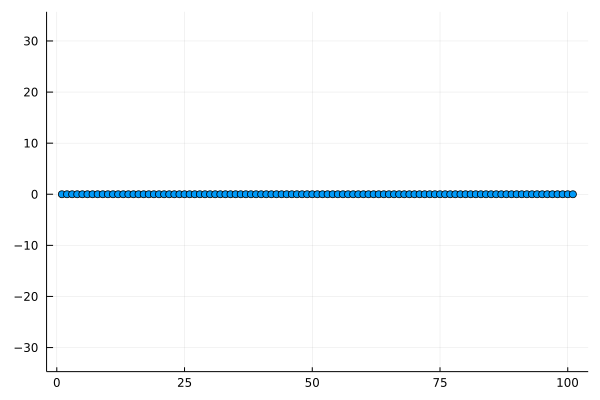

In [7]:
scatter(R[:, 1], R[:, 2], label="", ratio = 1)

In [8]:
#matriz de acoplamiento

V = zeros(ComplexF64, N,N)
for i = 1:N
    for j = 1:N
        if norm(R[i, :] - R[j, :]) == 1
            V[i, j] = 1
        else
            V[i, j] = 0
        end
    end
end

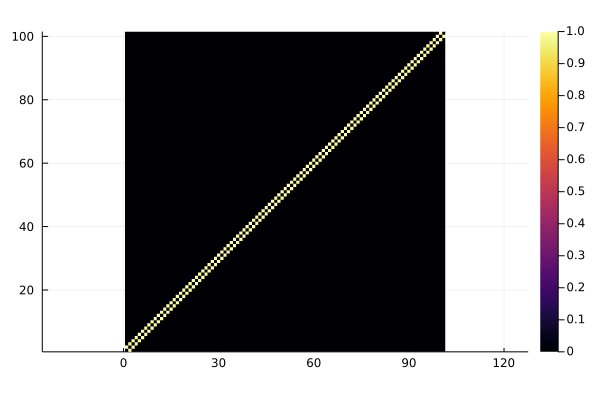

In [9]:
heatmap(real(V), ratio = 1)

In [10]:
function dnls_derivs(du, u, p, t) # agregar parámetros
    H = p; du[:] = H*u
end;

In [11]:
function evolution(H, ci, zmax, h, at, u0)     # eps -> Disorder width
    zspan = (0.0, zmax); p = H; prob = ODEProblem(dnls_derivs, u0, zspan, p);
    sol = solve(prob, RK4(), adaptive = false, dt = h, saveat = at);
    return sol
end;

In [23]:
γ = 0.0; # Parámetro no lineal
ci = 1.0; # Amplitud condición inicial 
tmax = 20; # Tiempo máximo
h = 0.01; # Paso de integración
at = h; # Paso para guardar la solución
Vcoup = im*V;
#u0 = zeros(ComplexF64, N);  u0[51] = ci; #u0[8]=2*ci;
Nvec = 1:N
u0 = complex(exp.(-1e10*(Nvec .- 51.0).^2))
H = Vcoup;
sol = evolution(H, ci, tmax, h, at, u0);

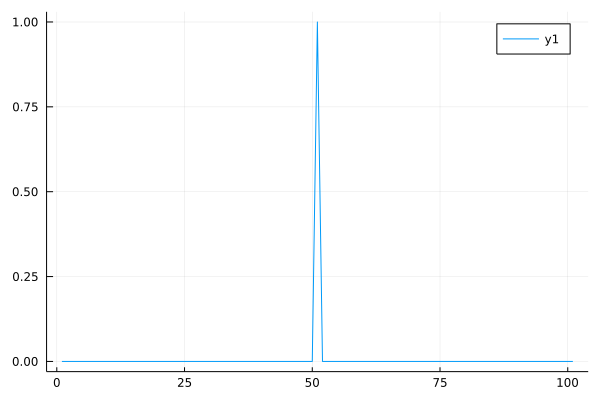

In [28]:
plot(abs.(u0))

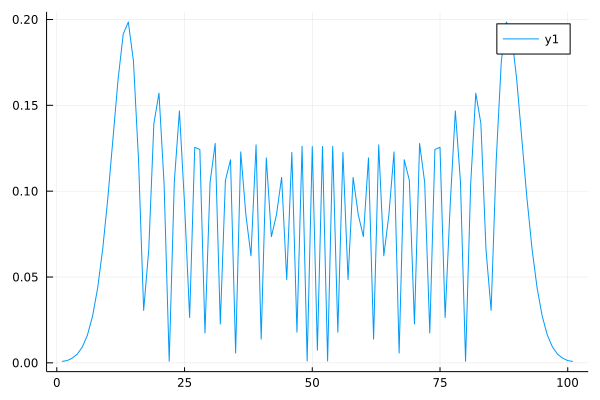

In [53]:
plot(E[:, end])

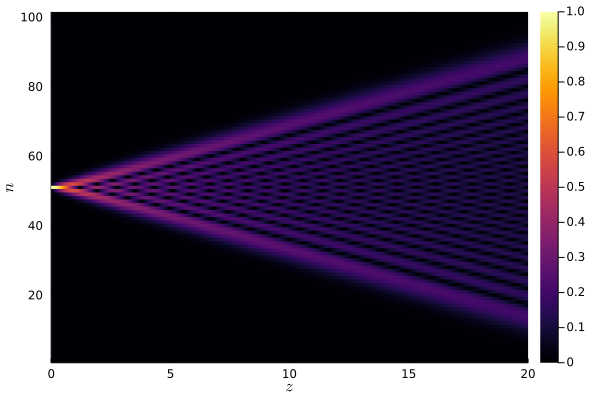

In [26]:
E = zeros(N, length(sol.t))
for i = 1:length(sol.t)
    E[:, i] = abs.(sol.u[i])
end
heatmap(sol.t, 1:101, E, xlabel = L"z", ylabel = L"n")

In [88]:
u0 = complex(exp.(-0.5*(Nvec .- 51.0).^2))
h = 0.01; 
sol = evolution(H, ci, tmax, h, at, u0);

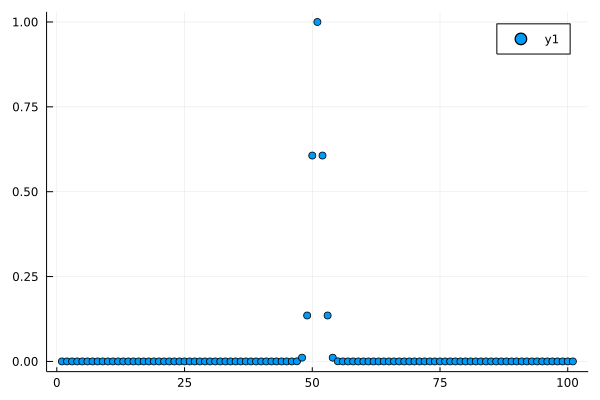

In [89]:
scatter(abs.(u0))

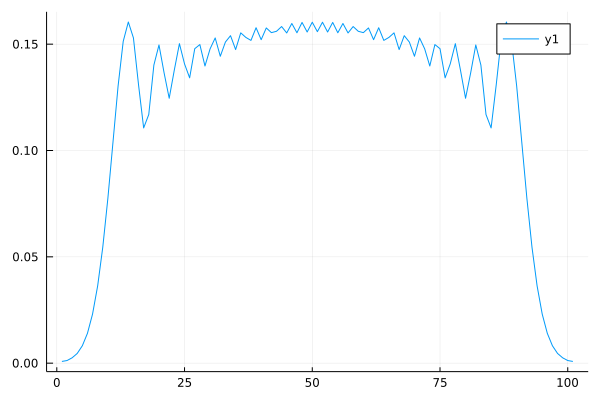

In [93]:
plot(E[:, end])

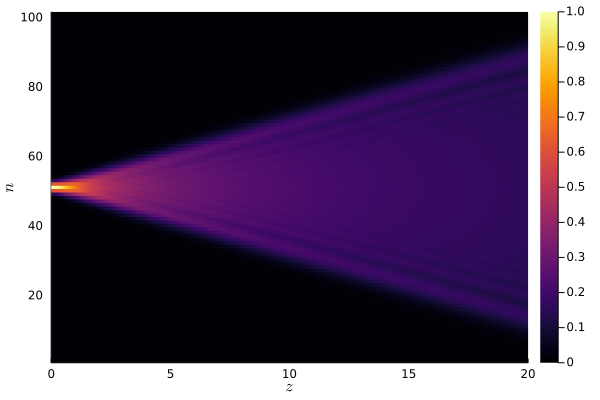

In [90]:
E = zeros(N, length(sol.t))
for i = 1:length(sol.t)
    E[:, i] = abs.(sol.u[i])
end
heatmap(sol.t, 1:101, E, xlabel = L"z", ylabel = L"n")

## Propagación no lineal (DNLSE)

\begin{equation}
i\frac{d\phi_n}{dz} + V\left( \phi_{n+1} + \phi_{n-1} \right ) + \gamma |\phi_n|^2 \phi_n = 0
\end{equation}

Consideremos ahora el caso de tres guías de onda (trímero):

\begin{equation}
i\frac{d}{dz}\begin{bmatrix} \phi_1 \\ \phi_2 \\ \phi_3 \end{bmatrix} + \begin{bmatrix} 0 & V & 0\\ V & 0 & V \\ 0 & V & 0 \end{bmatrix} \begin{bmatrix} \phi_1 \\ \phi_2 \\ \phi_3 \end{bmatrix} +\gamma \begin{bmatrix} |\phi_1|^2 & 0 & 0\\ 0 & |\phi_2|^2 & 0 \\ 0 & 0 & |\phi_3|^2 \end{bmatrix} \begin{bmatrix} \phi_1 \\ \phi_2 \\ \phi_3 \end{bmatrix}  = 0,
\end{equation}

In [112]:
function dnls_derivs(du, u, p, t) # agregar parámetros
    V = p; N = γ*im*diagm(abs.(u).^2) ; du[:] = (V + N)*u
end;

In [109]:
function evolution(V, ci, zmax, h, at, u0)     # eps -> Disorder width
    zspan = (0.0, zmax); p = V; prob = ODEProblem(dnls_derivs, u0, zspan, p);
    sol = solve(prob, RK4(), adaptive = false, dt = h, saveat = at);
    return sol
end;

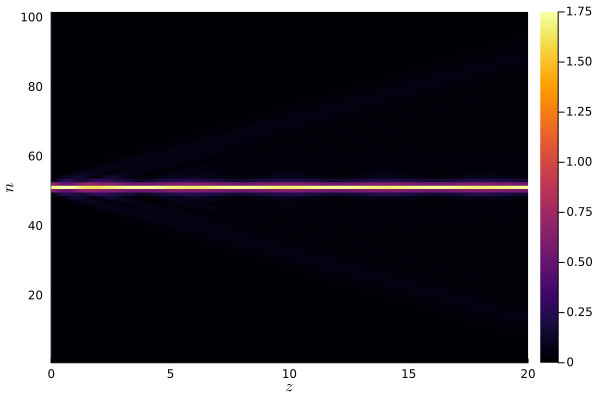

In [129]:
γ = 1.0; # Parámetro no lineal
ci = 1.0; # Amplitud condición inicial 
tmax = 20; # Tiempo máximo
h = 0.01; # Paso de integración
at = h; # Paso para guardar la solución
Vcoup = im*V;
#u0 = zeros(ComplexF64, N);  u0[51] = ci; #u0[8]=2*ci;
Nvec = 1:N
u0 = 1.7*complex(exp.(-(Nvec .- 51.0).^2))
H = Vcoup;
sol = evolution(H, ci, tmax, h, at, u0);
E = zeros(N, length(sol.t))
for i = 1:length(sol.t)
    E[:, i] = abs.(sol.u[i])
end
heatmap(sol.t, 1:101, E, xlabel = L"z", ylabel = L"n")

In [3]:
nmax = 5000; A = diagm(rand(nmax));

In [5]:
evals = @time eigvals(A);

  7.105750 seconds (14 allocations: 192.376 MiB, 1.62% gc time)


In [6]:
B = sparse(A);

In [7]:
B

5000×5000 SparseMatrixCSC{Float64,Int64} with 5000 stored entries:
  [1   ,    1]  =  0.324677
  [2   ,    2]  =  0.591238
  [3   ,    3]  =  0.259572
  [4   ,    4]  =  0.505733
  [5   ,    5]  =  0.61079
  [6   ,    6]  =  0.313824
  [7   ,    7]  =  0.163566
  [8   ,    8]  =  0.12139
  [9   ,    9]  =  0.905144
  [10  ,   10]  =  0.185288
  [11  ,   11]  =  0.457859
  [12  ,   12]  =  0.944936
  ⋮
  [4988, 4988]  =  0.362351
  [4989, 4989]  =  0.124394
  [4990, 4990]  =  0.326561
  [4991, 4991]  =  0.415219
  [4992, 4992]  =  0.215206
  [4993, 4993]  =  0.280715
  [4994, 4994]  =  0.958526
  [4995, 4995]  =  0.754781
  [4996, 4996]  =  0.713392
  [4997, 4997]  =  0.000265713
  [4998, 4998]  =  0.874952
  [4999, 4999]  =  0.0352334
  [5000, 5000]  =  0.859612

In [ ]:
evals = @time eigs(B);